In [170]:
import pandas as pd
#https://github.com/shouvikmani/AirbnbDataAnalysis/blob/master/Analyzing_Airbnb_in_New_York_City.ipynb

In [171]:
listingsSummary = pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/listings_summary.csv")

C:\Users\Raghvendra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [172]:
listingsSummary.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12
1,3309,https://www.airbnb.com/rooms/3309,20200218053611,2020-02-19,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200218053611,2020-02-19,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08


Let's clean the price column

In [173]:
priceUpdated = listingsSummary['price'].map(lambda p: int(p[1:-3].replace(",", "")))
listingsSummary['price'] = priceUpdated
listingsSummary['price'].describe()

count    25197.000000
mean        73.849863
std        225.236453
min          0.000000
25%         35.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

In [174]:
listingsSummary['price'].head()

0     90
1     28
2    125
3     33
4    180
Name: price, dtype: int64

In [175]:
listingsSummary.price.mean()

73.84986307893797

In [176]:
listingsSummary.price.median()

50.0

Factors affecting prices:

In [177]:
import matplotlib.pyplot as plt

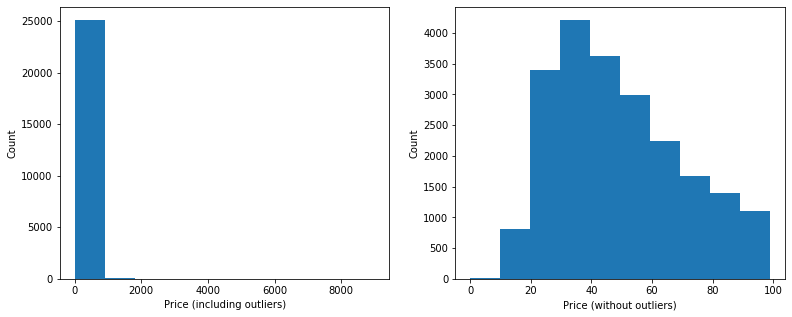

In [178]:
def plotHistogram(listingsSummary, name, xlabel):
    allValues = listingsSummary[name].dropna()
    plt.hist(allValues)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
name = 'price'
xlabel = 'Price (including outliers)'
plotHistogram(listingsSummary, name, xlabel)

plt.subplot(1, 2, 2)
# Removing the outliers having prices over $100
outliersDF = listingsSummary[listingsSummary['price'] > 100]
listingsSummary = listingsSummary[listingsSummary['price'] < 100]
listingsSummary = listingsSummary.reset_index(drop=True)

xlabel = 'Price (without outliers)'
plotHistogram(listingsSummary, name, xlabel)


Let's check the relationship between categorical variables and price

In [179]:
from collections import Counter

In [180]:
listingsSummary['name'].head()

0       Fabulous Flat in great Location
1     BerlinSpot Schöneberg near KaDeWe
2      BrightRoom with sunny greenview!
3          Apartment in Prenzlauer Berg
4    In the Heart of Berlin - Kreuzberg
Name: name, dtype: object

In [181]:
listingsSummary = listingsSummary.rename(columns={'name': 'nameUpdated'})

In [182]:
listingsSummary['nameUpdated'].head()

0       Fabulous Flat in great Location
1     BerlinSpot Schöneberg near KaDeWe
2      BrightRoom with sunny greenview!
3          Apartment in Prenzlauer Berg
4    In the Heart of Berlin - Kreuzberg
Name: nameUpdated, dtype: object

In [183]:
listingsSummary['accommodates'].head()

0    4
1    1
2    2
3    1
4    5
Name: accommodates, dtype: int64

In [184]:
listingsSummary['review_scores_rating'].head()

0    93.0
1    89.0
2    97.0
3    93.0
4    94.0
Name: review_scores_rating, dtype: float64

In [185]:
import math
#import sys

In [186]:
regressionDF = pd.DataFrame(listingsSummary['price'])

# Bathrooms
bathroomsMode = listingsSummary['bathrooms'].mode()[0]
listingsSummary['bathrooms'] = listingsSummary['bathrooms'].fillna(bathroomsMode)
listingsSummary['bathrooms'] = listingsSummary['bathrooms'].apply(lambda x: math.ceil(x))
regressionDF['bathrooms_1orFewer'] = (listingsSummary['bathrooms'] <= 1).astype(int)
regressionDF['bathrooms_2orMore'] = (listingsSummary['bathrooms'] >= 2).astype(int)

# Bedrooms
bedroomsMode = listingsSummary['bedrooms'].mode()[0]
listingsSummary['bedrooms'] = listingsSummary['bedrooms'].fillna(bedroomsMode)
regressionDF['bedrooms_0'] = (listingsSummary['bedrooms'] == 0.0).astype(int)
regressionDF['bedrooms_1'] = (listingsSummary['bedrooms'] == 1.0).astype(int)
regressionDF['bedrooms_2orMore'] = (listingsSummary['bedrooms'] >= 2).astype(int)

# Beds
bedsMode = listingsSummary['beds'].mode()[0]
listingsSummary['beds'] = listingsSummary['beds'].fillna(bedsMode)
regressionDF['beds_1'] = (listingsSummary['beds'] == 1.0).astype(int)
regressionDF['beds_2'] = (listingsSummary['beds'] == 2.0).astype(int)
regressionDF['beds_3orMore'] = (listingsSummary['beds'] >= 3).astype(int)

# Capacity
for i in range(1, 5):
    regressionDF['capacity_' + str(i)] = (listingsSummary['accommodates'] == i).astype(int)
regressionDF['capacity_5orMore'] = (listingsSummary['accommodates'] >= 5).astype(int)

# Star Rating
starRatingMode = listingsSummary['review_scores_rating'].mode()[0]
listingsSummary['review_scores_rating'] = listingsSummary['review_scores_rating'].fillna(starRatingMode)
regressionDF['review_scores_rating_80orLess'] = (listingsSummary['review_scores_rating'] <= 80).astype(int)
regressionDF['review_scores_rating_90'] = (listingsSummary['review_scores_rating'] == 90).astype(int)
regressionDF['review_scores_rating_100'] = (listingsSummary['review_scores_rating'] == 100).astype(int)

# Property Type
regressionDF['property_apartment'] = (listingsSummary['property_type'] == 'Apartment').astype(int)
regressionDF['property_house'] = (listingsSummary['property_type'] == 'House').astype(int)
regressionDF['property_other'] = (~listingsSummary['property_type'].isin(['Apartment', 'House'])).astype(int)

# Average Neighborhood Rent
#regressionDF['avg_neighborhood_rent'] = listingsSummary['avg_neighborhood_rent']

# Design matrix used for regression
regressionDF.head()

,price,bathrooms_1orFewer,bathrooms_2orMore,bedrooms_0,bedrooms_1,bedrooms_2orMore,beds_1,beds_2,beds_3orMore,capacity_1,capacity_2,capacity_3,capacity_4,capacity_5orMore,review_scores_rating_80orLess,review_scores_rating_90,review_scores_rating_100,property_apartment,property_house,property_other
0,90,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,28,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,33,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,70,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,90,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


Multivariate linear regression

In [187]:
import numpy as np
import statsmodels.api as sm

In [188]:
# Source: http://datasciencecourse.org/nonlinear_modeling.pdf
np.random.seed(0)
perm = np.random.permutation(len(regressionDF))
trainIndices = perm[:int(len(perm) * 0.7)]
testIndices = perm[int(len(perm) * 0.7):]

y_train = regressionDF.loc[trainIndices, 'price']
X_train = regressionDF.loc[trainIndices, 
                            ['bathrooms_2orMore',  'bedrooms_0', 'bedrooms_2orMore',
                             'beds_2', 'beds_3orMore','capacity_2', 'capacity_3', 
                             'capacity_4', 'capacity_5orMore','review_scores_rating_80orLess', 
                             'review_scores_rating_90','property_house', 'property_other']]
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
reg = model.fit()
print(reg.summary2())

                       Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.204      
Dependent Variable:    price               AIC:                   130705.9956
Date:                  2020-04-14 16:40    BIC:                   130812.6355
No. Observations:      15020               Log-Likelihood:        -65339.    
Df Model:              13                  F-statistic:           297.2      
Df Residuals:          15006               Prob (F-statistic):    0.00       
R-squared:             0.205               Scale:                 351.89     
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                         33.3967   0.4260 78.3970 0.0000 32.5617 34.2317
bathrooms_2orMore             -2.7246   0.5254 -5.1861 0.0000 -3.7543 -1.6948
bedrooms_

C:\Users\Raghvendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We get an adjusted R2 value of .20 which is a measure of goodness of fit (between 0 and 1)

In [189]:
X_train = regressionDF.loc[trainIndices, 
                            ['bedrooms_0', 'bedrooms_2orMore', 'beds_2',
                             'capacity_2', 'capacity_3', 'capacity_4', 'capacity_5orMore',
                             'property_house', 'property_other']]
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
reg = model.fit()
print(reg.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.200      
Dependent Variable: price            AIC:                130777.3633
Date:               2020-04-14 16:40 BIC:                130853.5347
No. Observations:   15020            Log-Likelihood:     -65379.    
Df Model:           9                F-statistic:        418.4      
Df Residuals:       15010            Prob (F-statistic): 0.00       
R-squared:          0.201            Scale:              353.66     
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                32.7263   0.4196 78.0004 0.0000 31.9039 33.5487
bedrooms_0            5.2679   0.5603  9.4012 0.0000  4.1695  6.3662
bedrooms_2orMore      8.5817   0.6053 14.1783 0.0000  7.3953  9.7681
beds_2               -0.8087   0.4210 -1.9210 0.0548 

Text(0, 0.5, 'Residuals')

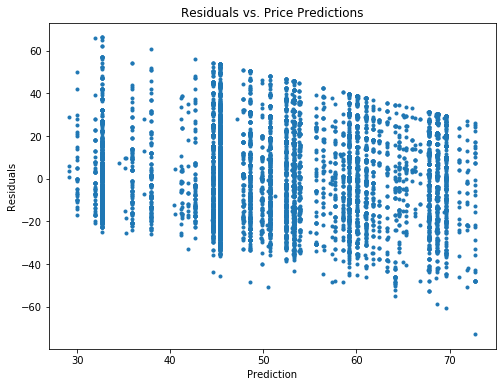

In [190]:
plt.figure(figsize=(8,6))

predictions = reg.predict()
residuals = reg.resid
plt.plot(predictions, residuals, '.')
plt.title('Residuals vs. Price Predictions')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

In [191]:
import scipy.stats as stats

In [192]:
regressionDF['price'].head()

0    90
1    28
2    33
3    70
4    90
Name: price, dtype: int64

In [193]:
regressionDF['log_price'] = np.log(listingsSummary['price'])

C:\Users\Raghvendra\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [194]:
regressionDF['log_price'].head()

0    4.499810
1    3.332205
2    3.496508
3    4.248495
4    4.499810
Name: log_price, dtype: float64

In [196]:
X_train = regressionDF.loc[trainIndices, 
                            ['bedrooms_0', 'bedrooms_2orMore', 'beds_2',
                             'capacity_2', 'capacity_3', 'capacity_4', 'capacity_5orMore',
                             'property_house', 'property_other']]
X_train = sm.add_constant(X_train)

y_train = regressionDF.loc[trainIndices, 'log_price']
model = sm.OLS(y_train, X_train)
reg = model.fit()
#residuals = reg.resid
print(reg.summary2())

              Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan
Dependent Variable: log_price        AIC:                nan
Date:               2020-04-14 16:42 BIC:                nan
No. Observations:   15020            Log-Likelihood:     nan
Df Model:           9                F-statistic:        nan
Df Residuals:       15010            Prob (F-statistic): nan
R-squared:          nan              Scale:              nan
-------------------------------------------------------------
                  Coef.  Std.Err.   t   P>|t|  [0.025  0.975]
-------------------------------------------------------------
const               nan       nan  nan    nan     nan     nan
bedrooms_0          inf       nan  nan    nan     nan     nan
bedrooms_2orMore    nan       nan  nan    nan     nan     nan
beds_2              inf       nan  nan    nan     nan     nan
capacity_2         -inf       nan  nan    nan     nan     nan
capacity_3          nan       n

C:\Users\Raghvendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [198]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("---- Log Price Predictions ---")
print("Predicted:", reg.predict(X_test)[:10])
print("Actual:", y_test[:10].as_matrix())
#print
print("---- Actual Price Predictions ---")
print("Predicted:", np.round(np.exp(reg.predict(X_test))[:10]))
print("Actual:", np.exp(y_test)[:10].as_matrix())
#print

# Mean Squared Errors (of log price)
print("---- Mean Squared Errors (of log price) ---")
trainMeanMSE = np.mean((np.mean(y_train) - y_train) ** 2)
trainMSE = np.mean((reg.predict(X_train) - y_train) ** 2)
print('Training MSE for predicting mean on every example:', trainMeanMSE)
print('Training MSE:', trainMSE)
#print
testMeanMSE = np.mean((np.mean(y_train) - y_test) ** 2)
testMSE = np.mean((reg.predict(X_test) - y_test) ** 2)
print('Test MSE for predicting mean on every example:', testMeanMSE)
print('Test MSE:', testMSE)

C:\Users\Raghvendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [197]:
y_test = regressionDF.loc[testIndices, 'log_price']
X_test = regressionDF.loc[testIndices, 
                            ['bedrooms_0', 'bedrooms_2orMore', 'beds_2',
                             'capacity_2', 'capacity_3', 'capacity_4', 'capacity_5orMore',
                             'property_house', 'property_other',
                             'avg_neighborhood_rent']]
X_test = sm.add_constant(X_test)

print("---- Log Price Predictions ---")
print("Predicted:", reg.predict(X_test)[:10])
print("Actual:", y_test[:10].as_matrix())
#print
print("---- Actual Price Predictions ---")
print("Predicted:", np.round(np.exp(reg.predict(X_test))[:10]))
print("Actual:", np.exp(y_test)[:10].as_matrix())
#print

# Mean Squared Errors (of log price)
print("---- Mean Squared Errors (of log price) ---")
trainMeanMSE = np.mean((np.mean(y_train) - y_train) ** 2)
trainMSE = np.mean((reg.predict(X_train) - y_train) ** 2)
print('Training MSE for predicting mean on every example:', trainMeanMSE)
print('Training MSE:', trainMSE)
#print
testMeanMSE = np.mean((np.mean(y_train) - y_test) ** 2)
testMSE = np.mean((reg.predict(X_test) - y_test) ** 2)
print('Test MSE for predicting mean on every example:', testMeanMSE)
print('Test MSE:', testMSE)

---- Log Price Predictions ---


C:\Users\Raghvendra\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: shapes (6438,11) and (10,) not aligned: 11 (dim 1) != 10 (dim 0)

In [ ]:
def plotBarPlot(listingsSummary, name, xlabel, includeXTicks=True):
    counts = Counter(listingsSummary[nameUpdated])
    countValuesSortedByKeys = map(lambda key: counts[key], sorted(counts.keys()))
    plt.bar(range(len(countValuesSortedByKeys)), countValuesSortedByKeys)
    if includeXTicks:
        plt.xticks(np.arange(len(counts))+0.4, sorted(counts.keys()))
    plt.axis('tight')
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    
def plotBoxPlot(listingsSummary, name, xlabel, includeXTicks=True):
    varPrices = []   # will contain grouped prices for each value of name
    for value, group in listingsSummary.groupby([nameUpdated]):
        varPrices.append(group['price'].as_matrix())
    plt.boxplot(varPrices)
    allValues = listingsSummary[nameUpdated].dropna()
    if includeXTicks:
        plt.xticks(range(1, len(allValues.unique()) + 1),
                   sorted(allValues.unique()))
    plt.xlabel(xlabel)
    plt.ylabel('Price')

# Categorical variables except property type
variables = [
    {'name': 'bathrooms', 'xlabel': 'Number of Bathrooms'},
    {'name': 'bedrooms', 'xlabel': 'Number of Bedrooms'},
    {'name': 'beds', 'xlabel': 'Number of Beds'},
    #{'name': 'person_capacity', 'xlabel': 'Capacity (people)'},
    {'name': 'host_has_profile_pic', 'xlabel': 'Host has Profile Picture?'},
    {'name': 'host_is_superhost', 'xlabel': 'Is Superhost?'},
    #{'name': 'star_rating', 'xlabel': 'Star Rating'}
]

plt.figure(figsize=(12,32))
for i, var in enumerate(variables):
    name = var['name']
    xlabel = var['xlabel']
    # Plot histogram
    plt.subplot(5, 2, 2*i+1)
    plotHistogram(listingsSummary, name, xlabel)
    # Plot box plot
    plt.subplot(5, 2, 2*i+2)
    plotBoxPlot(listingsSummary, name, xlabel)
    
# Property type categorical variable
name = 'property_type'
xlabel = 'Property Type'
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plotBarPlot(listingsSummary, name, xlabel)
plt.subplot(2, 1, 2)
plotBoxPlot(listingsSummary, name, xlabel)

In [ ]:
plt.figure(figsize=(8,4))
regularizationParams = np.logspace(-5,5,11)
model = sm.OLS(y_train, X_train)
rSquaredValues = [model.fit_regularized(alpha=param) for param in regularizationParams]
plt.semilogx(regularizationParams, rSquaredValues)
plt.title('R Squared vs. Regularization Parameter')
plt.xlabel('Regularization Parameter')
plt.ylabel('R Squared')
print('Best adjusted R-squared:', max(rSquaredValues))

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.title("Distribution of Residuals")
plt.xlabel('Residual')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title("Probability Plot (Residuals)")

# Log transform response variable and refit model
regressionDF['log_price'] = np.log(listingsSummary['price'])
y_train = regressionDF.loc[trainIndices, 'log_price']
model = sm.OLS(y_train, X_train)
reg = model.fit()
residuals = reg.resid

# Residuals after log transform
plt.subplot(2, 2, 3)
plt.hist(residuals)
plt.title("Distribution of Residuals (after log transform)")
plt.xlabel('Residual')
plt.ylabel('Count')

# QQ Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals, plot=plt)
plt.title("Probability Plot (Residuals after log transform)")